### very simple linear regression

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [54]:
salary = pd.read_csv('data/salary.csv')

salary.shape

(30, 3)

In [55]:
salary.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [56]:
salary = salary.drop('Unnamed: 0',axis=1)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

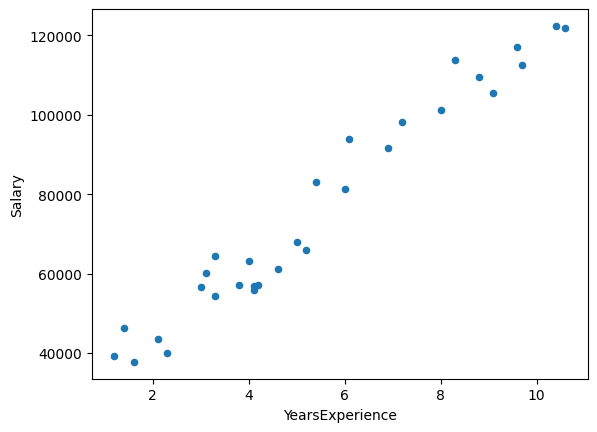

In [57]:
salary.plot.scatter(x='YearsExperience',y='Salary')

In [ ]:

model = ols("Salary ~ YearsExperience",data=salary).fit()

model.params

Intercept          24848.203967
YearsExperience     9449.962321
dtype: float64

In [59]:
salary = salary.assign(salary_predict=model.fittedvalues)

/tmp/ipykernel_7323/1294212765.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


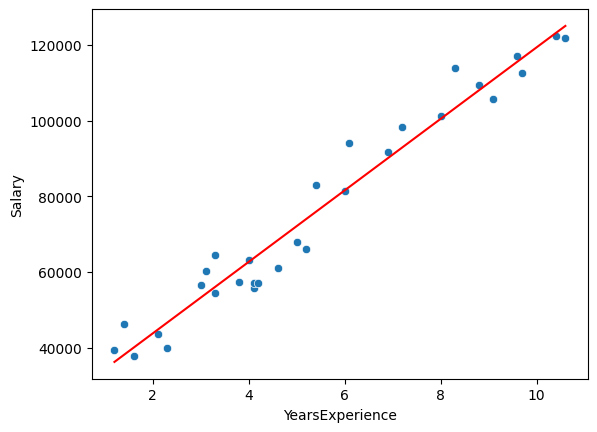

In [60]:
fig = plt.figure()

sns.scatterplot(x='YearsExperience',y='Salary',data=salary)

sns.lineplot(x='YearsExperience',y='salary_predict',data=salary,color='red')

fig.show()

/tmp/ipykernel_7323/108375061.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


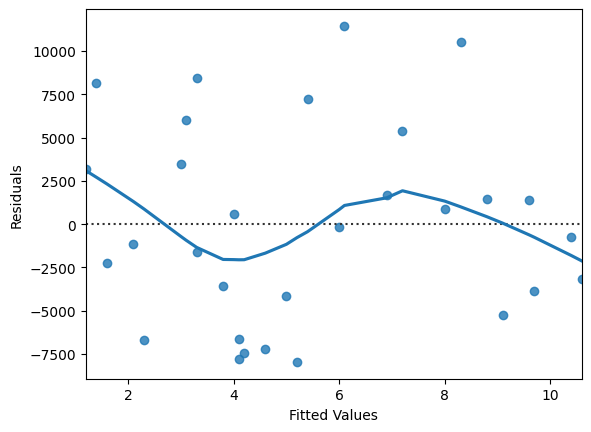

In [88]:
## Plote de Resíduo:
fig = plt.figure()

sns.residplot(x='YearsExperience',y='Salary',data=salary,lowess=True)

plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

fig.show()

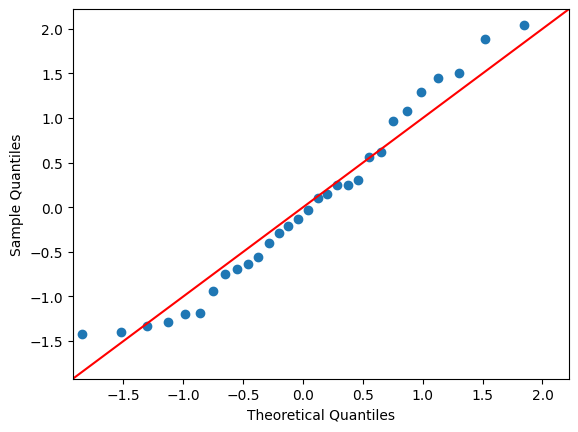

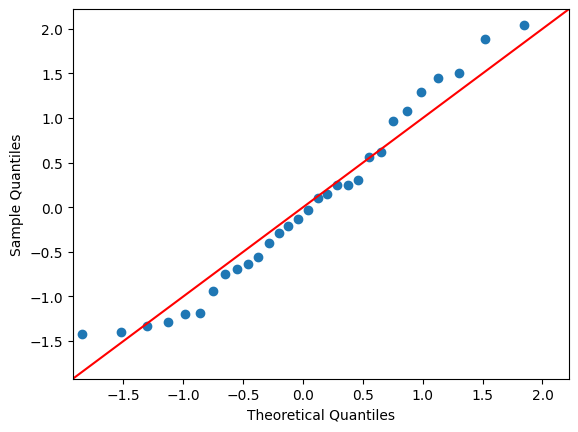

In [89]:
resid = model.resid
sm.qqplot(resid,line='45',fit=True)

<Axes: >

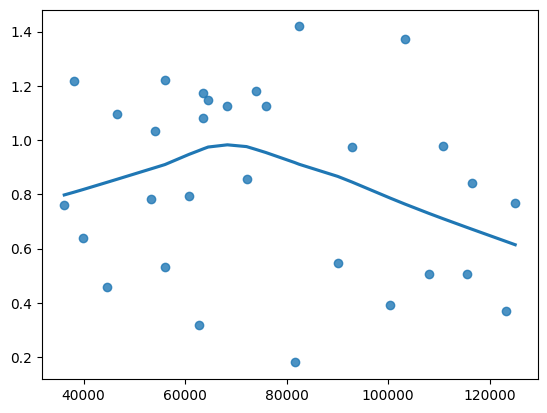

In [96]:
model_norm = model.get_influence().resid_studentized_internal
model_norm_abs_sqrt = np.sqrt(np.abs(model_norm))

sns.regplot(x=model.fittedvalues,y=model_norm_abs_sqrt,ci=None,lowess=True)

## Logistic Regression

In [79]:
possum = pd.read_csv('data/possum.csv')

possum = possum[['sex','hdlngth']]

possum['isMale'] = possum['sex'].apply(lambda sex: 1 if sex == 'm' else 0)

possum.head()

,sex,hdlngth,isMale
0,m,94.1,1
1,f,92.5,0
2,f,94.0,0
3,f,93.2,0
4,f,91.5,0


In [80]:
from statsmodels.formula.api import logit 

sex_vs_hdlngth = logit('isMale ~ hdlngth',data=possum).fit()

sex_vs_hdlngth.params

Optimization terminated successfully.
         Current function value: 0.672311
         Iterations 4


Intercept   -5.390600
hdlngth      0.062032
dtype: float64

<Axes: xlabel='hdlngth', ylabel='isMale'>

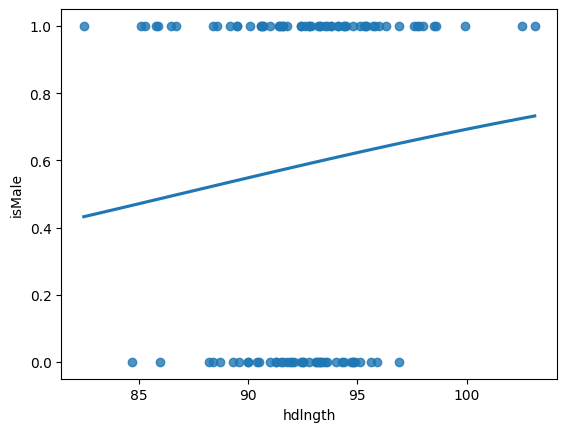

In [81]:
sns.regplot(x='hdlngth',y='isMale',data=possum,ci=None,logistic=True)

In [82]:
actual = possum['isMale']

predicted = np.round(sex_vs_hdlngth.predict(possum['hdlngth']))

pd.DataFrame({'actual':actual,'predicted':predicted}).value_counts()

actual  predicted
1       1.0          54
0       1.0          41
1       0.0           7
0       0.0           2
Name: count, dtype: int64

In [83]:
conf_matrix = sex_vs_hdlngth.pred_table()
conf_matrix

array([[ 2., 41.],
       [ 7., 54.]])

(<Figure size 640x480 with 3 Axes>,
 {('0', '0'): (0.0, 0.0, 0.41140451588212784, 0.04635710422622266),
  ('0', '1'): (0.0,
   0.04967936336243529,
   0.41140451588212784,
   0.9503206366375646),
  ('1', '0'): (0.41637964026023727,
   0.0,
   0.5836203597397628,
   0.1143728555089592),
  ('1', '1'): (0.41637964026023727,
   0.11769511464517182,
   0.5836203597397628,
   0.8823048853548281)})

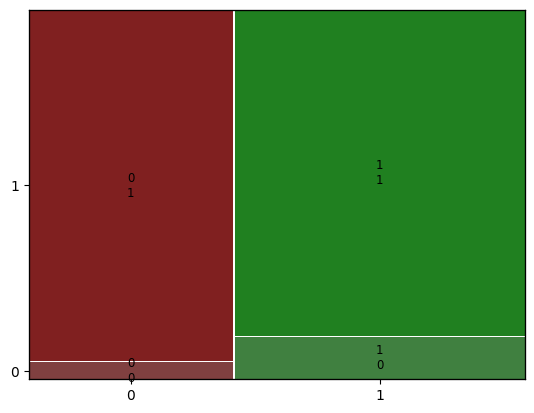

In [84]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(conf_matrix)

In [85]:
accuracy  = (conf_matrix[0,0] + conf_matrix[1,1])/np.sum(conf_matrix)

accuracy

0.5384615384615384

## Multiple Linear Regression

In [ ]:
students = pd.read_csv('data/student.csv')

students['Extracurricular Activities'] = students['Extracurricular Activities'].apply(lambda extra: 1 if extra == 'Yes' else 0)

dic = {}

for column in students.columns:
    dic[column] = column.replace(" ","_").lower()

students = students.rename(dic,axis=1)

students.head()

,hours_studied,previous_scores,extracurricular_activities,sleep_hours,sample_question_papers_practiced,performance_index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


#### Variables:
- Hours Studied: The total number of hours spent studying by each student.
- Previous Scores: The scores obtained by students in previous tests.
- Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).
- Sleep Hours: The average number of hours of sleep the student had per day.
- Sample Question Papers Practiced: The number of sample question papers the student practiced.

#### Target Variable:
- Performance Index: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.

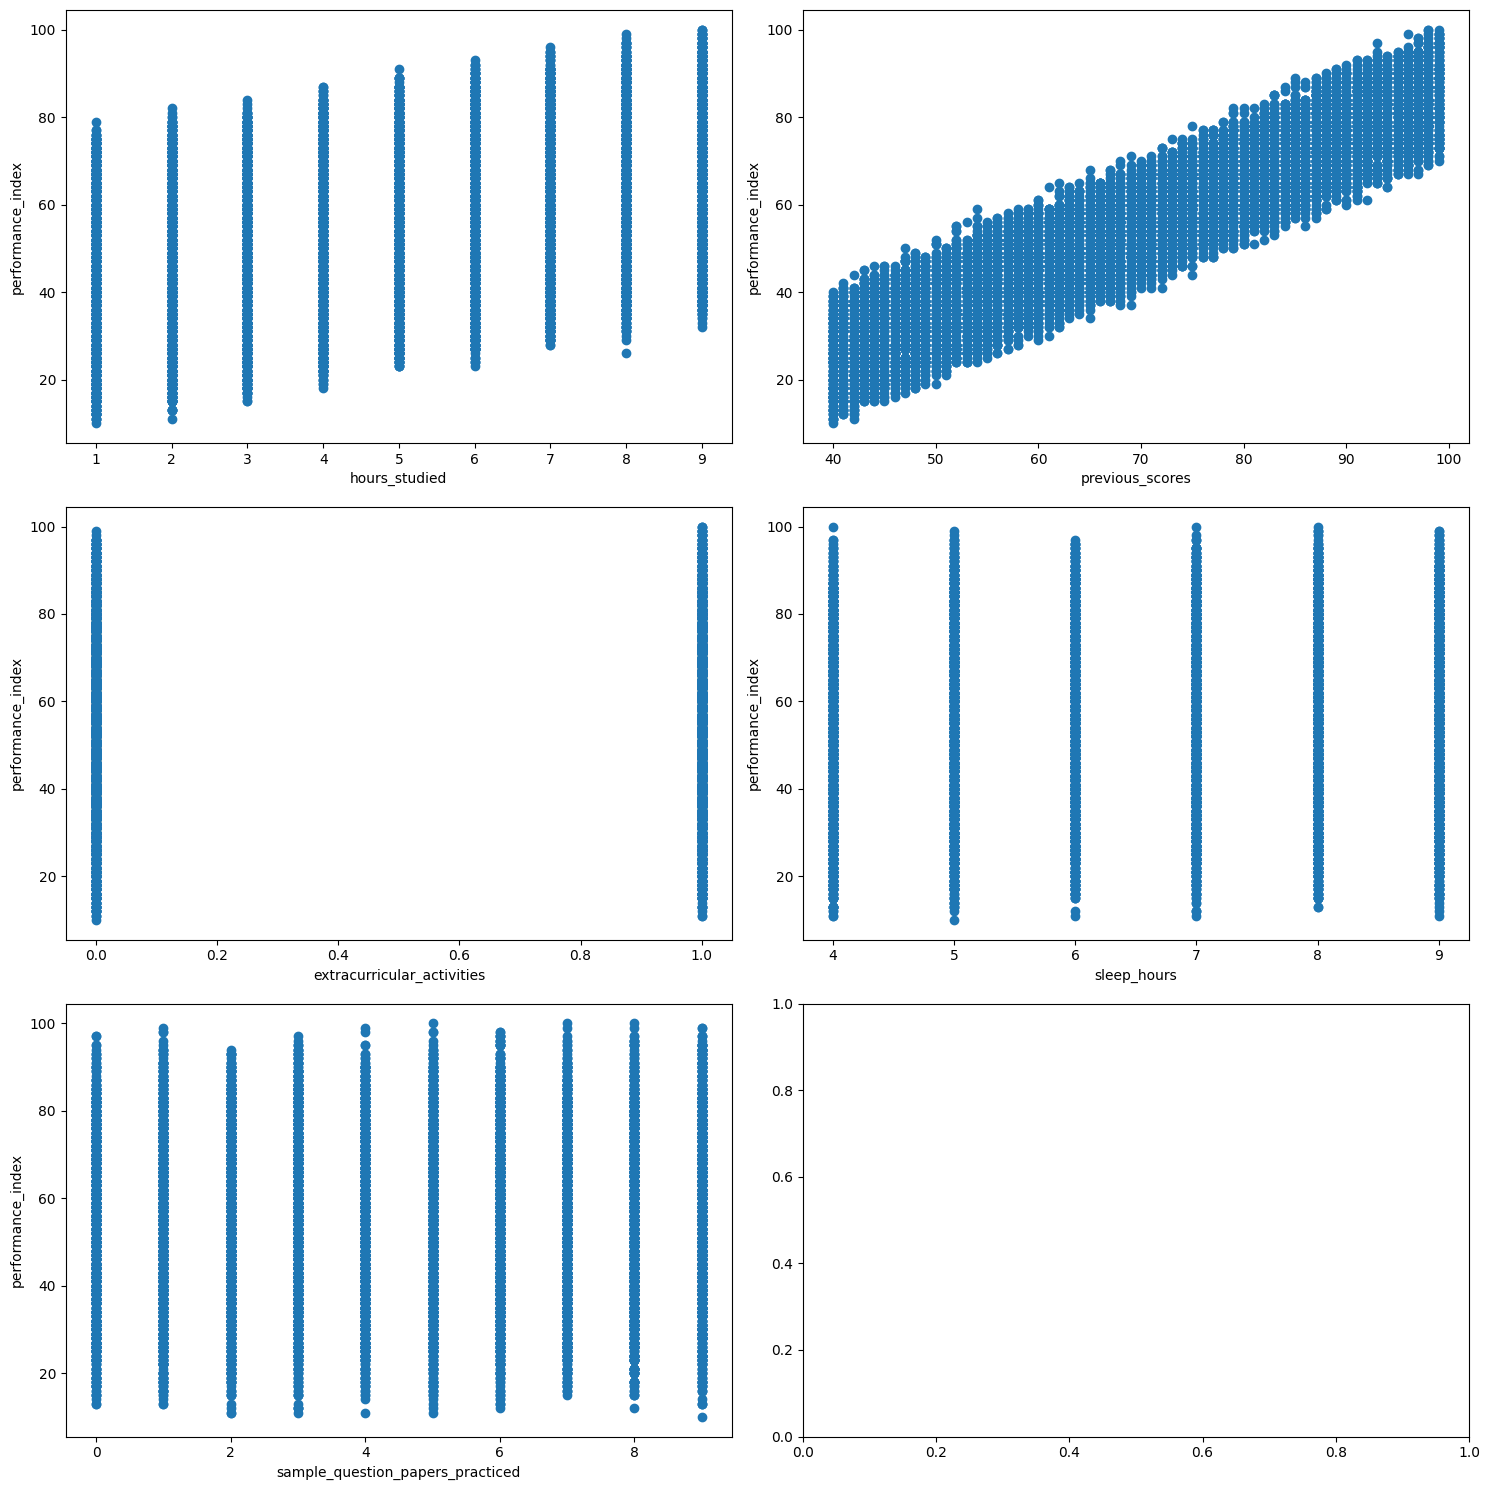

In [131]:
columns = students.columns
columns = columns[columns != "performance_index"]

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
axs = axs.flatten() 

for i,column in enumerate(columns):
    axs[i].scatter(x=students[column],y=students["performance_index"])
    axs[i].set_xlabel(column)
    axs[i].set_ylabel("performance_index")

plt.tight_layout()
plt.show()

In [132]:
students.corr()['performance_index'].sort_values(ascending=False)

performance_index                   1.000000
previous_scores                     0.915189
hours_studied                       0.373730
sleep_hours                         0.048106
sample_question_papers_practiced    0.043268
extracurricular_activities          0.024525
Name: performance_index, dtype: float64

In [ ]:
model_student = ols('performance_index ~ previous_scores  + hours_studied',data=students).fit()
model_student.params

Intercept         -29.816790
previous_scores     1.019123
hours_studied       2.857637
dtype: float64

In [143]:
print(model_student.summary())

                            OLS Regression Results                            
Dep. Variable:      performance_index   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 3.488e+05
Date:                Wed, 19 Mar 2025   Prob (F-statistic):               0.00
Time:                        16:11:28   Log-Likelihood:                -22446.
No. Observations:               10000   AIC:                         4.490e+04
Df Residuals:                    9997   BIC:                         4.492e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -29.8168      0.105   -2

<Figure size 640x480 with 0 Axes>

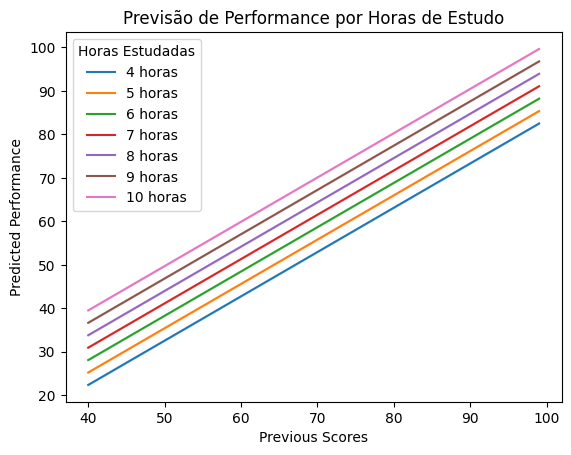

In [146]:
explanarory = students.loc[:,['previous_scores']]

fig = plt.figure()

explanatory = students.loc[:, ['previous_scores']].copy()

fig = plt.figure()

# Loop para cada valor de horas estudadas
for hours in [4, 5, 6, 7, 8, 9, 10]:
    
    # Cria uma cópia para não sobrescrever o dataframe original
    temp_df = explanatory.copy()
    
    # Define o valor de hours_studied igual ao valor atual do loop
    temp_df['hours_studied'] = hours
    
    # Faz a previsão com base nesses valores
    temp_df['predict_performance'] = model_student.predict(temp_df)
    
    # Plota a linha para esse valor de horas estudadas
    sns.lineplot(
        x='previous_scores',
        y='predict_performance',
        data=temp_df,
        label=f'{hours} horas'  # legenda para cada linha
    )

plt.title('Previsão de Performance por Horas de Estudo')
plt.xlabel('Previous Scores')
plt.ylabel('Predicted Performance')
plt.legend(title='Horas Estudadas')

plt.show()